In [129]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [130]:
#Read input file and understand the data
# "default" is my dependent variable

In [131]:
c_df = pd.read_csv("german_credit.csv")

In [132]:
c_df['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

In [133]:
c_df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

 #### many columns are of type object i.e. strings. These need to be converted to ordinal type

In [134]:
c_df.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [135]:
if c_df.isnull().values.any():
    print("There is missing data, check the sample of data to drop")
else:
    print("There is no missing data in the given sample")

There is no missing data in the given sample


# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [136]:
# Print Shape of model data
c_df.shape

(1000, 21)

In [137]:
cols= c_df.select_dtypes(include=['object'])
cat_cols= list(cols.columns)
print('The list of categorical attributes are:\n',cat_cols)

The list of categorical attributes are:
 ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [138]:
d_df = pd.get_dummies(c_df, columns = cat_cols)
d_df.head(6)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1
5,0,36,9055,2,4,35,1,2,0,0,...,0,0,0,0,0,1,0,1,0,1


In [139]:
d_df.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [140]:
# List highly correlated features
c = d_df.corr()

# Pivots the row/class labels with respective values: matrix -> list
s = c.stack()


In [141]:
# Select and sort (descending) all pairs with correlation values 0.5<x<1 or -1<x<-0.5

so = s[(0.5<s) & (s<1) | (-1<s) & (s<-0.5)].sort_values(ascending=False, kind='quicksort')
print(so)

housing_for free                                                            property_unknown / no property                                                0.779853
property_unknown / no property                                              housing_for free                                                              0.779853
duration_in_month                                                           credit_amount                                                                 0.624984
credit_amount                                                               duration_in_month                                                             0.624984
credits_this_bank                                                           credit_history_critical account/ other credits existing (not at this bank)    0.501364
credit_history_critical account/ other credits existing (not at this bank)  credits_this_bank                                                             0.501364
credits_this_bank     

In [142]:
#f = plt.figure(figsize=(19, 62))
#plt.matshow(d_df.corr(), fignum=f.number)
#plt.xticks(range(d_df.shape[1]), d_df.columns, fontsize=14, rotation=45)
#plt.yticks(range(d_df.shape[1]), d_df.columns, fontsize=14)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)

### Drop the original variables which are converted to dummy

In [143]:
#The catagorical variables that are converted to dummies are 
print(cat_cols)

['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [144]:
for dup_col in cat_cols:
    if dum_df.columns.isin(list(dup_col)).any():
        dum_df.drop([dup_col], axis=1, inplace=True)
        print(dup_col, "dropped from the dummy dataframe")
    else:
        print("The coulmn \"%s\"" %dup_col,"is not present in dummy dataframe")
   

The coulmn "account_check_status" is not present in dummy dataframe
The coulmn "credit_history" is not present in dummy dataframe
The coulmn "purpose" is not present in dummy dataframe
The coulmn "savings" is not present in dummy dataframe
The coulmn "present_emp_since" is not present in dummy dataframe
The coulmn "personal_status_sex" is not present in dummy dataframe
The coulmn "other_debtors" is not present in dummy dataframe
The coulmn "property" is not present in dummy dataframe
The coulmn "other_installment_plans" is not present in dummy dataframe
The coulmn "housing" is not present in dummy dataframe
The coulmn "job" is not present in dummy dataframe
The coulmn "telephone" is not present in dummy dataframe
The coulmn "foreign_worker" is not present in dummy dataframe


In [145]:
## drop_first is set as True, it gives k-1 dummies out of k categorical levels by removing the first level.

dum_df = pd.get_dummies(c_df, columns = cat_cols,drop_first=True)
print(dum_df.shape)

(1000, 49)


In [146]:
dum_df.head(3)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [147]:
from sklearn.model_selection import train_test_split

X_ = dum_df.drop("default", axis=1)
y_ = dum_df.pop("default")
X =  X_.to_numpy()
y =  y_.to_numpy()
print(X.shape,y.shape)
# convert dataframe to array by using .to_numpy()

(1000, 48) (1000,)


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [149]:
from sklearn.ensemble import RandomForestClassifier 
rf_model=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [150]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [151]:
rf_model.score(X_test , y_test)      # performance on test data

0.79

In [197]:
predicted_test_labels = rf_model.predict(X_test)
print(predicted_test_labels.shape)

(300,)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [153]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,predicted_test_labels)

conf_matrix

array([[202,  15],
       [ 48,  35]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

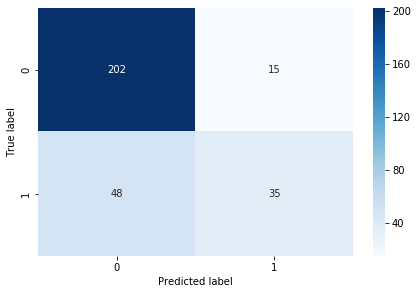

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [155]:
print("Accuracy of test data is",rf_model.score(X_test , y_test) )

Accuracy of test data is 0.79


### Q6 Show the list of the features importance( 1 Marks)

In [171]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

feature_imp = pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X_.columns)

In [176]:
print(feature_imp.sort_values("Imp", ascending = False))

                                                         Imp
credit_amount                                       0.116171
age                                                 0.091958
duration_in_month                                   0.086272
account_check_status_no checking account            0.056920
installment_as_income_perc                          0.041192
present_res_since                                   0.039835
account_check_status_< 0 DM                         0.034739
other_installment_plans_none                        0.021859
personal_status_sex_male : single                   0.020952
savings_... < 100 DM                                0.020929
credits_this_bank                                   0.020832
credit_history_critical account/ other credits ...  0.020335
telephone_yes, registered under the customers n...  0.019920
job_skilled employee / official                     0.019635
purpose_car (new)                                   0.018915
present_emp_since_... < 

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [159]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [160]:
# Use below values
num_folds = 10
seed = 77

In [161]:
#Validate the Random Forest model build above using k fold

In [164]:
kfold = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')


In [165]:
#Calculate Mean score

In [166]:
cv_results.mean()

0.767

In [167]:
# Calculate score standard deviation using std()

In [168]:
cv_results.std()

0.057105166141076934

# Q8 Print the confusion matrix( 1 Marks)

In [191]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(rf_model, X_test, y_test, cv=kfold) 
print(predicted.shape)

(300,)


In [193]:
cm_cv = confusion_matrix(y_test, predicted)
print(cm_cv)

[[204  13]
 [ 65  18]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [210]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       217
           1       0.58      0.22      0.32        83

    accuracy                           0.74       300
   macro avg       0.67      0.58      0.58       300
weighted avg       0.71      0.74      0.69       300



In [211]:
metrics.accuracy_score(y_test, predicted)

0.74

In [212]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

In [213]:
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  204
False Positives:  13
False Negatives:  65
True Positives:  18


In [214]:
corrPred = tp+tn
print('Correct predictions: ', corrPred)
print('Percentage of Correct predictions: ', (corrPred/300)*100)

Correct predictions:  222
Percentage of Correct predictions:  74.0


In [215]:
falsePred =fp+fn
print('\nFalse predictions', falsePred)


False predictions 78


In [216]:
#Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN
Sensitivity = tp/(tp+fn)
print('Sensitivity is : ', Sensitivity)

Sensitivity is :  0.21686746987951808


In [217]:
#Precision (true positives / predicted positives) = TP / TP + FP
Precision = tp / tp + fp
print('Precision is : ', Precision)

Precision is :  14.0


In [218]:
#Specificity (true negatives / all actual negatives) =TN / TN + FP
Specificity = tn /(tn+fp)
print('Specificity is : ', Specificity)

Specificity is :  0.9400921658986175


In [219]:
#Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN

All = tp + tn + fp +fn 
Misclassification = falsePred/All
print('Misclassification is : ', Misclassification)

Misclassification is :  0.26


In [220]:
#Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN
Accuracy = corrPred/All
print('Accuracy is : ', Accuracy)

Accuracy is :  0.74


[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [221]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [224]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rf_model.fit(X_, y_)
    y_pred = rf_model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [225]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7693333333333333
Standard deviation:  0.015260697523012791
